In [22]:
# import basic libraries and autograd wrapped numpy
import autograd.numpy as np
import copy
import matplotlib.pyplot as plt


# this is needed to compensate for matplotlib notebook's tendancy to blow up images when plotted inline
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

# Exercise 3.1. First-order condition for optimality

In [23]:
def plot(x, y, title, opt):
    plt.plot(x, y, label = 'function', zorder=1)
    if opt is not None:
        plt.scatter(opt[0], opt[1], 100, 'r', marker='x', label = 'global optimum', zorder=2)
    plt.title(f"Question {title}")
    plt.show()

#### Question a

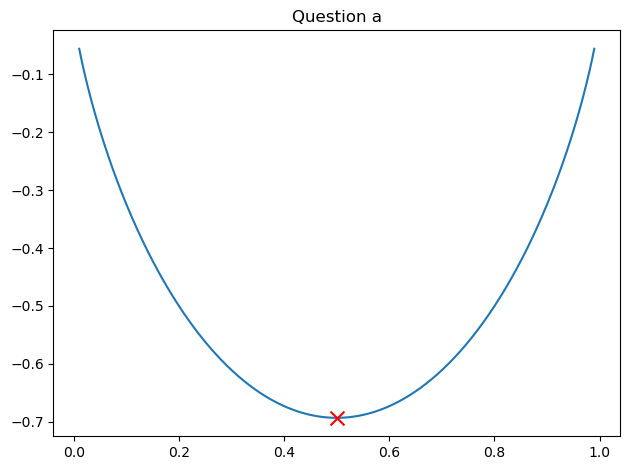

In [24]:
# Question a
x = np.linspace(0.01, 0.99, 1000)
y = x * np.log(x) + (1-x) * np.log(1-x)
plot(x, y, "a", [0.5, np.log(0.5)])


$$
\begin{align}
\nabla{g} = log(w) + \frac{w}{w} - log(1-w) - \frac{1-w}{1-w} \\
= log(w) + 1 - log(1-w) -1 = log(\frac{w}{1-w}) \\

\nabla{g} = 0 \Rightarrow log(\frac{w}{1-w}) = 0 \Rightarrow  \frac{w}{1-w} = 1 \Rightarrow  w = \frac{1}{2}\\

\end{align}
$$
Therefore, there is only 1 stationary point $\frac{1}{2}$. From the plot, the stationary point is global minimum.

#### Question b

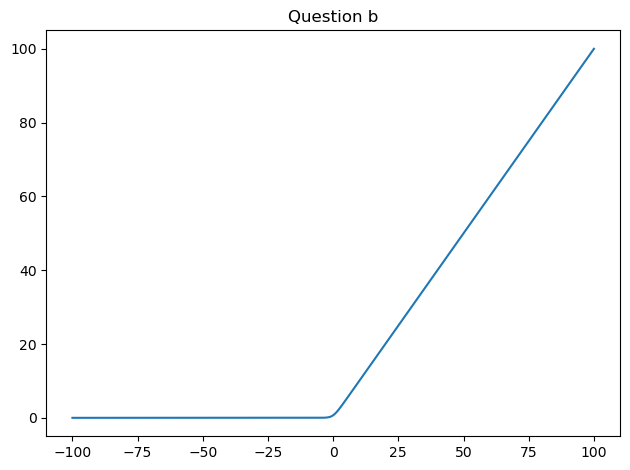

In [25]:
# Question b
x = np.linspace(-100, 100, 100000)
y = np.log(1+np.exp(x))
plot(x, y, "b", None)

$$
\begin{align}
\nabla g = \frac{e^w}{1+e^w} \\
\nabla g = 0 \Rightarrow \frac{e^w}{1+e^w} = 0 \\
e^w > 0 \ \ \forall w \in R 
\end{align}
$$
Therefore, there is no stationary point. As is shown in the plot, the function keep increasing. No stationary point in this function.

#### Question c

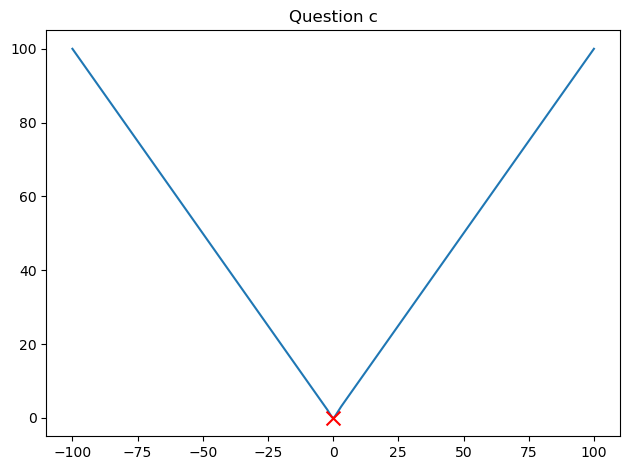

In [26]:
# Question c
x = np.linspace(-100, 100, 100000)
y = x * np.tanh(x)
plot(x, y, "c", [0, 0])



$$
\begin{align}
\nabla g = tanh(w) + w(1-tanh^2(w)) \\ 
=tanh(w)+wsech^2(w) \\ \\
w > 0 \Rightarrow tanh(w) > 0; wsech^2(w) \geq 0\\
so \ \ \nabla g =tanh(w)+wsech^2(w) > 0 \ \ \forall w>0 \\ \\
w < 0 \Rightarrow tanh(w) < 0; wsech^2(w) \leq 0\\
so \ \ \nabla g =tanh(w)+wsech^2(w) < 0 \ \ \forall w<0 \\ \\
w = 0 \Rightarrow \nabla g = 0 + 0 = 0
\end{align}
$$
Therefore, w=0 is the only stationary point. Hence, (0, 0) is the global minimum.

#### Question d
$$
\begin{align}
\nabla g = \frac{1}{2}(C^T + C)w + b = Cw + b
\nabla g = 0 \Rightarrow Cw + b = 0
\end{align}
$$

We can get 
$$
\begin{cases}
2w_1 + w_2 + 1 = 0 \\
w_1 + 3w_2 + 1 = 0
\end{cases}
$$

$$
\begin{cases}
w_1 = -\frac{2}{5} \\
w_2 = -\frac{1}{5}
\end{cases}
$$
so the function has a unique stationary point of $[-\frac{2}{5} -\frac{1}{5}]^T$


In [27]:

# Question d

w1 = np.linspace(-100, 100, 1000)[:, np.newaxis]
w2 = np.linspace(-100, 100, 1000)[:, np.newaxis]
w = np.concatenate((w1, w2), axis=1).transpose()
C = np.array([[2, 1], [1, 3]])
b = np.array([[1], [1]])
# z = 0.5 * w.transpose() @ C @ w + b.transpose
# () @ w
z = np.zeros((1000, 1000))
for i in range(1000):
    for j in range(1000):
        w = np.concatenate((w1[i:i+1, :], w2[j:j+1, :]), axis=1).transpose() 
        z[i, j] = 0.5*w.T@C@w + b.T@w

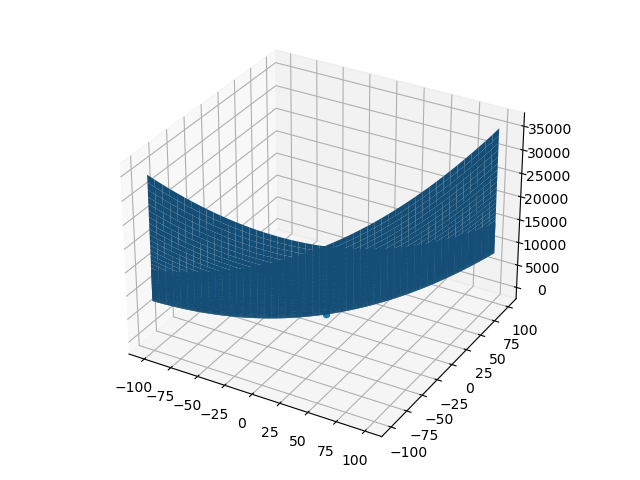

In [28]:
%matplotlib widget
ax = plt.axes(projection='3d')
ax.plot_surface(w1, w2, z)
ax.scatter3D(-0.4, -0.2, 0)
plt.show()

From the plot, it can be concluded that $[-\frac{2}{5} -\frac{1}{5}]^T$ is the global minimum

# Exercise 3.3. Stationary points of the Rayleigh quotient

$$
\begin{align}
\nabla g = \frac{w^T(C + C^T)w^Tw - 2w^TCww^T}{||w||^4} \\
= w^T \frac{(C + C^T)||w||^2 - 2Cww^T}{||w||^4} \\
= \frac{w^T}{||w||^2}((C + C^T) - \frac{2Cww^T}{||w||^2})
\end{align}
$$


$$
\begin{align}
\nabla g = 0 \Rightarrow \frac{w^T}{||w||^2}((C + C^T) - \frac{2Cww^T}{||w||^2})=0 \\
\Rightarrow w^T(C + C^T) =  w^T\frac{2Cww^T}{||w||^2} \\
\Rightarrow (C + C^T)w = \frac{2}{||w||^2}(ww^TC^T)w \\
\end{align}
$$
Therefore, stationary points are the eigenvector of $C + C^T$, where the eigenvalues $\lambda$ is $\frac{2}{||w||^2}(ww^TC^T)$  

# Exercise 3.5.  Try out gradient descent

In this exercise you will implement gradient descent using the hand-computed derivative.

$$\frac{\partial}{\partial w}g(w) = \frac{1}{50}\left(4w^3 + 2w + 10 \right)$$

A skeleton of the desired algorithm is in the cell below.  All parts marked "TO DO" are for you to construct.

In [29]:
# gradient descent function - inputs: g (input function), alpha (steplength parameter), max_its (maximum number of iterations), w (initialization)
def gradient_descent(alpha,max_its,w):
    # cost for this example
    g = lambda w: 1/50*(w**4 + w**2 + 10*w)
    
    # the gradient function for this example
    grad = lambda w: 1/50*(4*w**3 + 2*w + 10)

    # run the gradient descent loop
    cost_history = [g(w)]        # container for corresponding cost function history
    for k in range(1,max_its+1):       
        # evaluate the gradient, store current weights and cost function value
        ## TO DO
        gradient = grad(w)

        # take gradient descent step
        ## TO DO
        w += -alpha * gradient
            
        # collect final weights
        cost_history.append(g(w))  
    return cost_history

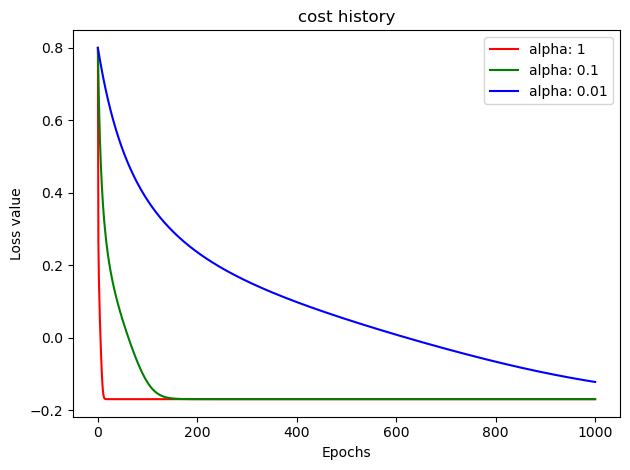

In [30]:
%matplotlib inline


# initial point
w = 2.0
max_its = 1000

# produce gradient descent runs
alpha = 10**(0)
cost_history_1 = gradient_descent(alpha,max_its,w)

alpha = 10**(-1)
cost_history_2 = gradient_descent(alpha,max_its,w)

alpha = 10**(-2)
cost_history_3 = gradient_descent(alpha,max_its,w)

# plot cost function histories
## TO DO
plt.figure()
x = np.arange(max_its+1)
plt.plot(x, cost_history_1, color="r", label=f'alpha: {10**(0)}')
plt.plot(x, cost_history_2, color="g", label=f'alpha: {10**(-1)}')
plt.plot(x, cost_history_3, color="b", label=f'alpha: {10**(-2)}')
plt.title("cost history")
plt.xlabel('Epochs')
plt.ylabel('Loss value')
plt.legend()
plt.show()

# Exercise 3.8 Tune fixed steplength for gradient descent

In [31]:
# gradient descent function - inputs: g (input function), alpha (steplength parameter), max_its (maximum number of iterations), w (initialization)
def gradient_descent(alpha,max_its,w):
    # cost for this example
    g = lambda w: w.T @ w
    
    # the gradient function for this example
    grad = lambda w: 2*w

    # run the gradient descent loop
    cost_history = [g(w)]        # container for corresponding cost function history
    for k in range(1,max_its+1):       
        # evaluate the gradient, store current weights and cost function value
        ## TO DO
        gradient = grad(w)

        # take gradient descent step
        ## TO DO
        w += -alpha * gradient
            
        # collect final weights
        cost_history.append(g(w).item(0, 0))  
    return cost_history

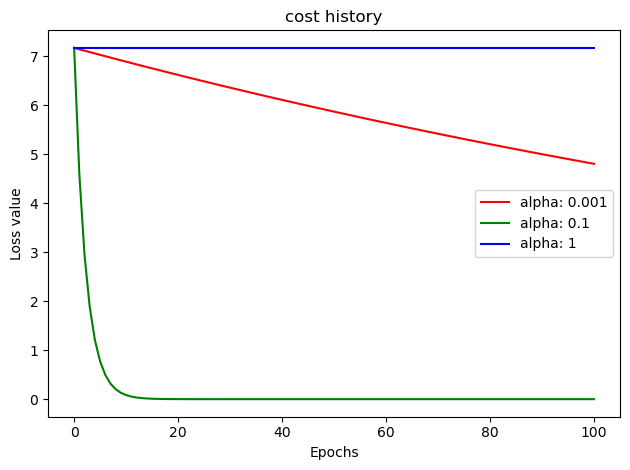

In [32]:

# initial point
w = np.random.randn(10, 1)
max_its = 100

# produce gradient descent runs
alpha = 0.001
cost_history_1 = gradient_descent(alpha,max_its,w.copy())

alpha = 0.1
cost_history_2 = gradient_descent(alpha,max_its,w.copy())

alpha = 1
cost_history_3 = gradient_descent(alpha,max_its,w.copy())

# plot cost function histories
## TO DO
plt.figure()
x = np.arange(max_its+1)
plt.plot(x, cost_history_1, color="r", label=f'alpha: {0.001}')
plt.plot(x, cost_history_2, color="g", label=f'alpha: {0.1}')
plt.plot(x, cost_history_3, color="b", label=f'alpha: {1}')
plt.title("cost history")
plt.xlabel('Epochs')
plt.ylabel('Loss value')
plt.legend()
plt.show()